In [1]:
# Install library
!pip install transformers

In [6]:
# Import library
import requests
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt
import random
from transformers import DetrImageProcessor, DetrForObjectDetection

Detected car with confidence 0.995 at location [54.78, 313.16, 165.16, 385.66]
Detected car with confidence 0.992 at location [287.69, 183.71, 316.66, 210.2]
Detected person with confidence 0.909 at location [192.51, 162.64, 199.18, 180.22]
Detected bicycle with confidence 0.97 at location [81.15, 246.38, 106.32, 275.14]
Detected car with confidence 0.96 at location [439.41, 204.94, 481.03, 244.08]
Detected car with confidence 0.989 at location [350.53, 179.93, 376.08, 201.83]
Detected person with confidence 0.938 at location [564.75, 238.09, 579.41, 272.26]
Detected car with confidence 0.994 at location [233.46, 196.48, 264.3, 223.81]
Detected person with confidence 0.956 at location [1.03, 258.01, 17.34, 304.07]
Detected car with confidence 0.971 at location [546.38, 276.2, 639.98, 387.01]
Detected person with confidence 0.936 at location [176.74, 171.96, 185.91, 194.76]
Detected car with confidence 0.992 at location [197.79, 240.54, 242.8, 278.81]
Detected traffic light with confide

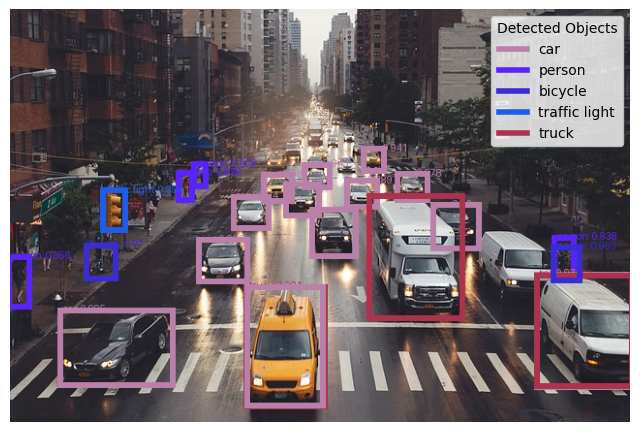

In [23]:
# Load the image
url = "https://cdn.pixabay.com/photo/2021/11/20/05/15/car-6810885_640.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load the processor and model
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process outputs (bounding boxes and class logits)
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Generate random colors for each label
unique_labels = set(results["labels"].tolist())
colors = {label: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for label in unique_labels}

# Create a list to store objects for the legend
legend_labels = []
legend_patches = []

# Bold effect thickness
bold_thickness = 6

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

    # Get the color for the current label
    color = colors[label.item()]

    # Draw the bold bounding box by drawing it multiple times with slight offsets
    for offset in range(bold_thickness):
        draw.rectangle(
            [box[0] - offset, box[1] - offset, box[2] + offset, box[3] + offset],
            outline=color, width=1
        )

    # Draw the label
    draw.text((box[0], box[1] - 10), label_text, fill=color, font=font)

    # Add to legend only if the label is not already there
    if label.item() not in legend_labels:
        legend_labels.append(label.item())
        legend_patches.append(plt.Line2D([0], [0], color=[x / 255.0 for x in color], lw=4, label=model.config.id2label[label.item()]))

# Display the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")

# Add the legend
plt.legend(handles=legend_patches, loc="upper right", title="Detected Objects")
plt.show()

Detected person with confidence 0.95 at location [544.41, 318.3, 572.08, 367.87]
Detected car with confidence 0.907 at location [49.32, 305.71, 118.72, 367.52]
Detected person with confidence 0.944 at location [332.36, 362.93, 360.38, 387.96]
Detected truck with confidence 0.981 at location [99.49, 159.68, 166.36, 228.47]
Detected car with confidence 0.983 at location [441.71, 331.01, 538.94, 387.87]
Detected person with confidence 0.936 at location [444.06, 292.85, 470.18, 335.41]
Detected person with confidence 0.937 at location [19.14, 326.86, 44.53, 369.62]
Detected motorcycle with confidence 0.983 at location [348.56, 293.62, 368.27, 321.63]
Detected car with confidence 0.9 at location [76.18, 362.06, 162.33, 387.98]
Detected car with confidence 0.904 at location [588.67, 271.6, 659.36, 312.37]
Detected car with confidence 0.934 at location [542.8, 248.27, 592.73, 288.87]
Detected motorcycle with confidence 0.926 at location [304.44, 244.74, 323.54, 271.26]
Detected truck with con

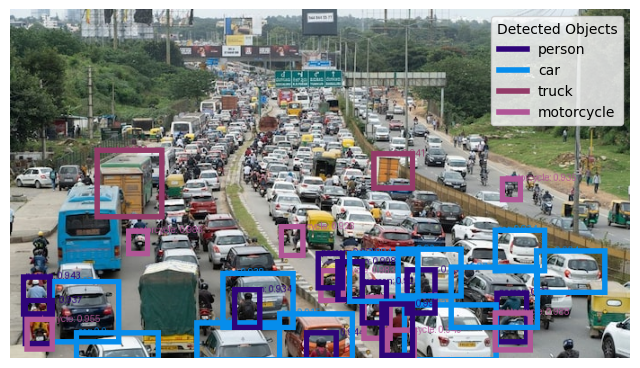

In [24]:
# Load the image
url = "https://akm-img-a-in.tosshub.com/indiatoday/images/story/202407/the-internet-disagreed-with-a-bengaluru-mans-idea-to-tackle-traffic-jams-in-the-city-photo-india-253620286-16x9_0.jpg?VersionId=r8va.ufQj3COOGRga9e0T2LCi0d36_Bf&size=690:388"
image = Image.open(requests.get(url, stream=True).raw)

# Load the processor and model
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process outputs (bounding boxes and class logits)
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Generate random colors for each label
unique_labels = set(results["labels"].tolist())
colors = {label: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for label in unique_labels}

# Create a list to store objects for the legend
legend_labels = []
legend_patches = []

# Bold effect thickness
bold_thickness = 6

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

    # Get the color for the current label
    color = colors[label.item()]

    # Draw the bold bounding box by drawing it multiple times with slight offsets
    for offset in range(bold_thickness):
        draw.rectangle(
            [box[0] - offset, box[1] - offset, box[2] + offset, box[3] + offset],
            outline=color, width=1
        )

    # Draw the label
    draw.text((box[0], box[1] - 10), label_text, fill=color, font=font)

    # Add to legend only if the label is not already there
    if label.item() not in legend_labels:
        legend_labels.append(label.item())
        legend_patches.append(plt.Line2D([0], [0], color=[x / 255.0 for x in color], lw=4, label=model.config.id2label[label.item()]))

# Display the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")

# Add the legend
plt.legend(handles=legend_patches, loc="upper right", title="Detected Objects")
plt.show()

Detected bicycle with confidence 0.998 at location [108.73, 326.88, 218.74, 438.24]
Detected traffic light with confidence 0.988 at location [58.11, 186.67, 103.23, 244.85]
Detected person with confidence 0.965 at location [618.68, 288.36, 632.97, 312.03]
Detected person with confidence 0.943 at location [718.51, 273.19, 733.01, 299.55]
Detected person with confidence 0.931 at location [466.98, 286.15, 480.1, 314.76]
Detected person with confidence 0.944 at location [664.3, 283.79, 675.32, 303.18]
Detected car with confidence 0.928 at location [623.69, 285.77, 645.07, 298.58]
Detected bicycle with confidence 0.999 at location [231.66, 329.01, 396.48, 461.93]
Detected traffic light with confidence 0.912 at location [53.4, 196.61, 81.62, 242.94]
Detected person with confidence 0.999 at location [332.67, 248.65, 390.45, 438.75]
Detected car with confidence 0.964 at location [591.19, 287.55, 610.14, 306.67]
Detected potted plant with confidence 0.949 at location [0.05, 272.34, 43.27, 343.5

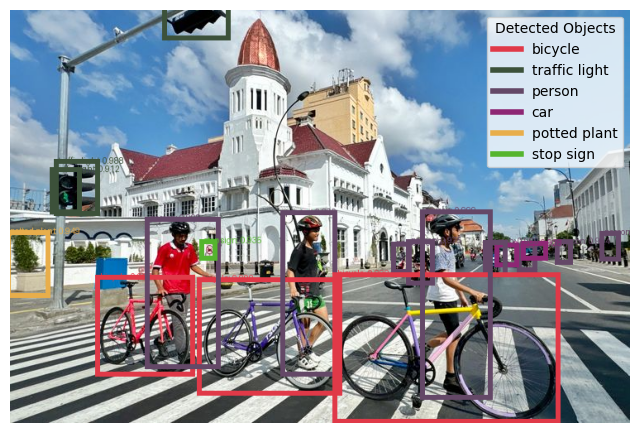

In [25]:
# Load the image
url = "https://asset.kompas.com/crops/YP-Vl5zFUV6EVRF_gSVTR2kQ9gM=/0x129:3304x2332/750x500/data/photo/2024/07/09/668d197098297.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load the processor and model
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Post-process outputs (bounding boxes and class logits)
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Generate random colors for each label
unique_labels = set(results["labels"].tolist())
colors = {label: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for label in unique_labels}

# Create a list to store objects for the legend
legend_labels = []
legend_patches = []

# Bold effect thickness
bold_thickness = 6

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

    # Get the color for the current label
    color = colors[label.item()]

    # Draw the bold bounding box by drawing it multiple times with slight offsets
    for offset in range(bold_thickness):
        draw.rectangle(
            [box[0] - offset, box[1] - offset, box[2] + offset, box[3] + offset],
            outline=color, width=1
        )

    # Draw the label
    draw.text((box[0], box[1] - 10), label_text, fill=color, font=font)

    # Add to legend only if the label is not already there
    if label.item() not in legend_labels:
        legend_labels.append(label.item())
        legend_patches.append(plt.Line2D([0], [0], color=[x / 255.0 for x in color], lw=4, label=model.config.id2label[label.item()]))

# Display the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")

# Add the legend
plt.legend(handles=legend_patches, loc="upper right", title="Detected Objects")
plt.show()